# sklearn 中使用 Logistic Regression

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt


In [3]:
iris = datasets.load_iris()

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [6]:
xtr ,xt , ytr, yt = train_test_split(iris.data, iris.target)

In [9]:
logreg_pipe = Pipeline([
    ("sc",StandardScaler()),
    ("logreg", LogisticRegression())
])

In [12]:
logreg_pipe.fit(xtr,ytr)

Pipeline(memory=None,
     steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logreg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [14]:
logreg_pipe.score(xt,yt) # 无需 scaling

0.8157894736842105

# 对于 二次项边界 的分类

In [38]:
x1 = np.random.random(100)*9-4
x2 = np.random.random(100)*9-4

In [39]:
x = np.hstack((x1.reshape(-1,1),x2.reshape(-1,1)))

In [51]:
y = np.array([1 if (x[i][0]**2+x[i][1]**2 > 10) else 0    for i in range(100)])


In [52]:
y==1  # np.array 才有这样的比较运算

array([ True,  True, False,  True,  True,  True,  True, False, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True, False,  True, False,  True,
       False, False, False, False,  True, False, False, False,  True,
       False,  True, False,  True,  True, False,  True, False,  True,
        True,  True,  True, False, False,  True,  True, False, False,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False, False,  True, False,  True,
       False, False,  True, False,  True, False, False,  True, False,
       False])

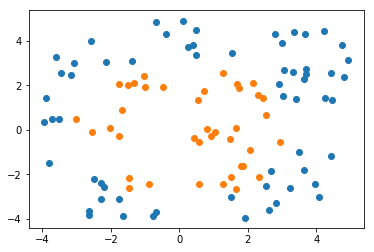

In [53]:
plt.scatter(x[y==1,0], x[y==1,1])
plt.scatter(x[y==False,0], x[y==False,1])
plt.show()

In [124]:
from sklearn.preprocessing import PolynomialFeatures

In [125]:
poly_pipe = Pipeline([
    ("poly", PolynomialFeatures(degree=20)),
    ("sc", StandardScaler()),
    ("log", LogisticRegression(C=10000000000000)) # 自带 L2 penalty
])

In [126]:
xtr, xt , ytr, yt = train_test_split(x,y)

In [127]:
poly_pipe.fit(xtr, ytr)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log', LogisticRegression(C=10000000000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [128]:
poly_pipe.score(xt,yt)

0.92